# GAN

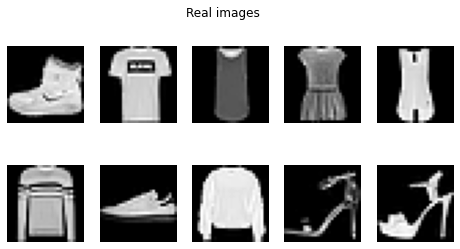

In [10]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt 
import numpy as np 

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#plt.imshow(X_train[1], cmap = "gray")

def display_images(data, title = "Sample_images"):
    fig, axes = plt.subplots(2,5, figsize = (8,4))

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap = "gray")
        ax.axis("off")
    
    fig.suptitle(title)

display_images(X_train, "Real images")


---
## Preparing data

In [11]:
import tensorflow as tf 

batch_size = 32
X_train = X_train.astype("float32")/255.
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)


<class 'numpy.ndarray'>


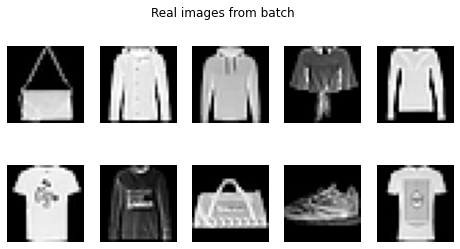

In [18]:
for data in dataset.take(1):
    print(type(data.numpy()))
    display_images(data, "Real images from batch")

## Build model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.initializers import LecunNormal

coding_size = 30 
image_shape = X_train[0].shape
print(image_shape)

generator = Sequential([
    Dense(100, activation = "selu", kernel_initializer = LecunNormal()),
    Dense(150, activation = "selu", kernel_initializer = LecunNormal()),
    Dense(image_shape[0]*image_shape[1], activation = "sigmoid"), 
    Reshape(image_shape)
])

discriminator = Sequential([
    Flatten(input_shape = image_shape),
    Dense(100, activation = "selu", kernel_initializer = LecunNormal()),
    Dense(150, activation = "selu", kernel_initializer = LecunNormal()),
    Dense(1, activation = "sigmoid")
])

gan = Sequential([generator, discriminator])

discriminator.compile(loss = "binary_crossentropy", optimizer = "rmsprop")
discriminator.trainable = False
gan.compile(loss = "binary_crossentropy", optimizer = "rmsprop")


(28, 28)


## Training loop

epoch=0
epoch=1


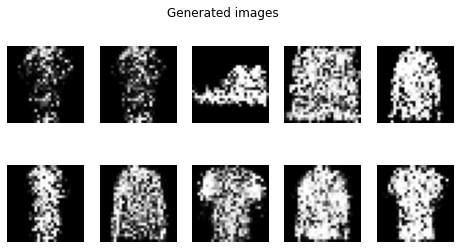

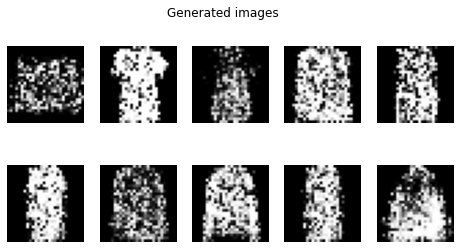

In [24]:
def train_gan(gan, dataset, batch_size, coding_size, n_epochs = 50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print(f"{epoch=}")

        for X_batch in dataset:
            # phase 1 - discriminator
            noise = tf.random.normal([batch_size, coding_size])
            generated_image = generator(noise)
            X_fake_real = tf.concat([generated_image, X_batch], axis = 0)
            y_train1 = tf.constant([[0.0]]*batch_size + [[1.]]*batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_real, y_train1)

            # phase 2 - generator
            noise = tf.random.normal([batch_size, coding_size])
            y_train2 = tf.constant([[1.]]*batch_size)

            discriminator.trainable = False
            gan.train_on_batch(noise, y_train2)
        display_images(generator(noise).numpy(), "Generated images")

train_gan(gan, dataset, batch_size, coding_size, 2)

In [23]:
tf.constant([[0.0]]*batch_size + [[1.]]*batch_size)

<tf.Tensor: shape=(64, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>